# Session 05: CPI and Treasury Yields Analysis

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fredapi import Fred
from dotenv import load_dotenv

# Load environment variables
load_dotenv()
fred_api_key = os.getenv('FRED_API_KEY')
fred = Fred(api_key=fred_api_key)

print(f"FRED API key loaded: {fred_api_key[:10]}...")

FRED API key loaded: 1383c60c37...


## FRED Series IDs for CPI and Treasury Yields

- **CPIAUCSL**: Consumer Price Index for All Urban Consumers: All Items in U.S. City Average
- **DGS10**: Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity
- **DGS1**: Market Yield on U.S. Treasury Securities at 1-Year Constant Maturity
- **DGS5**: Market Yield on U.S. Treasury Securities at 5-Year Constant Maturity

In [46]:
# Define FRED series IDs
series_ids = {
    'CPI': 'CPIAUCSL',  # Consumer Price Index
    '10Y Treasury': 'DGS10',  # 10-Year Treasury Yield
    '1Y Treasury': 'DGS1',  # 1-Year Treasury Yield
    '5Y Treasury': 'DGS5',  # 5-Year Treasury Yield
}

# Fetch data from FRED
data = {}
for name, series_id in series_ids.items():
    try:
        series = fred.get_series(series_id, observation_start='1960-01-01')
        data[name] = series
        print(f"Fetched {name}: {len(series)} observations")
    except Exception as e:
        print(f"Error fetching {name} ({series_id}): {e}")

# Create DataFrame
df = pd.DataFrame(data)
print(f"\nDataFrame shape: {df.shape}")
print(f"Date range: {df.index.min()} to {df.index.max()}")

Fetched CPI: 791 observations
Fetched 10Y Treasury: 16703 observations
Fetched 1Y Treasury: 16703 observations
Fetched 5Y Treasury: 16703 observations

DataFrame shape: (16947, 4)
Date range: 1960-01-01 00:00:00 to 2026-01-08 00:00:00


In [50]:
# Calculate year-over-year percentage change for CPI
df['CPI_YoY'] = df['CPI'].pct_change(periods=252) * 100

print("CPI Year-over-Year % Change calculated")
print("\nLast 5 observations:")
df[['CPI', 'CPI_YoY', '10Y Treasury']].tail(2000)

CPI Year-over-Year % Change calculated

Last 5 observations:


/var/folders/6p/l4s0yjhj757dpt1v1vj382tw0000gq/T/ipykernel_47427/2933995396.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['CPI_YoY'] = df['CPI'].pct_change(periods=252) * 100


,CPI,CPI_YoY,10Y Treasury
2018-06-18,NaN,2.773877,2.92
2018-06-19,NaN,2.773877,2.89
2018-06-20,NaN,2.773877,2.93
2018-06-21,NaN,2.773877,2.90
2018-06-22,NaN,2.773877,2.90
...,...,...,...
2026-01-02,NaN,1.863134,4.19
2026-01-05,NaN,1.863134,4.17
2026-01-06,NaN,1.863134,4.18
2026-01-07,NaN,1.863134,4.15


## Figure 1: CPI vs 10-Year Treasury Yield

In [51]:
df.tail(2000)

,CPI,10Y Treasury,1Y Treasury,5Y Treasury,CPI_YoY
2018-06-18,NaN,2.92,2.35,2.80,2.773877
2018-06-19,NaN,2.89,2.34,2.77,2.773877
2018-06-20,NaN,2.93,2.36,2.80,2.773877
2018-06-21,NaN,2.90,2.34,2.77,2.773877
2018-06-22,NaN,2.90,2.33,2.77,2.773877
...,...,...,...,...,...
2026-01-02,NaN,4.19,3.47,3.74,1.863134
2026-01-05,NaN,4.17,3.47,3.71,1.863134
2026-01-06,NaN,4.18,3.48,3.72,1.863134
2026-01-07,NaN,4.15,3.48,3.70,1.863134


/var/folders/6p/l4s0yjhj757dpt1v1vj382tw0000gq/T/ipykernel_47427/2375472190.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_plot = df_plot.resample('M').last().dropna()


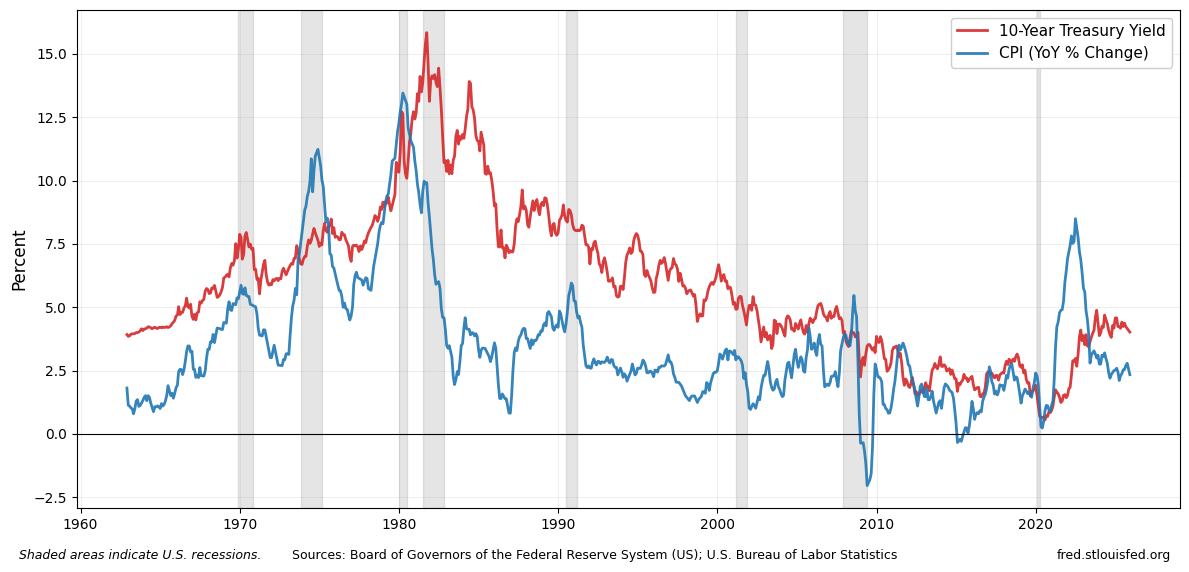

Figure saved to ../figures/cpi_vs_10y_treasury.png


In [56]:
# Create figure for CPI vs 10-Year Treasury
fig, ax = plt.subplots(figsize=(12, 6))

# Filter data from 1960 onwards
df_plot = df.loc['1960':].copy()

# Sample Monthly
df_plot = df_plot.resample('M').last().dropna()

# Plot both series
ax.plot(df_plot.index, df_plot['10Y Treasury'], 
        color='#d62728', linewidth=2, label='10-Year Treasury Yield', alpha=0.9)
ax.plot(df_plot.index, df_plot['CPI_YoY'], 
        color='#1f77b4', linewidth=2, label='CPI (YoY % Change)', alpha=0.9)

# Add recession shading (approximate periods)
recessions = [
    ('1969-12-01', '1970-11-01'),
    ('1973-11-01', '1975-03-01'),
    ('1980-01-01', '1980-07-01'),
    ('1981-07-01', '1982-11-01'),
    ('1990-07-01', '1991-03-01'),
    ('2001-03-01', '2001-11-01'),
    ('2007-12-01', '2009-06-01'),
    ('2020-02-01', '2020-04-01'),
]

for start, end in recessions:
    ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), 
               alpha=0.2, color='gray', zorder=0)

# Customize the plot
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('Percent', fontsize=12)
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)
ax.axhline(y=0, color='black', linewidth=0.8)

# Legend
ax.legend(loc='upper right', fontsize=11, framealpha=0.95)

# Add title in the style of FRED
# title_text = 'Consumer Price Index for All Urban Consumers: All Items in U.S. City Average\n'
# title_text += 'Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis'
# ax.text(0.02, 0.98, title_text, 
#         transform=ax.transAxes, fontsize=11, verticalalignment='top',
#         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add source and note
note_text = 'Shaded areas indicate U.S. recessions.'
source_text = 'Sources: Board of Governors of the Federal Reserve System (US); U.S. Bureau of Labor Statistics'
fig.text(0.02, 0.02, note_text, fontsize=9, style='italic')
fig.text(0.98, 0.02, 'fred.stlouisfed.org', fontsize=9, ha='right')
fig.text(0.5, 0.02, source_text, fontsize=9, ha='center')

plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.savefig('../figures/cpi_vs_10y_treasury.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved to ../figures/cpi_vs_10y_treasury.png")

## Figure 2: Treasury Yield Curve (1Y, 5Y, 10Y)

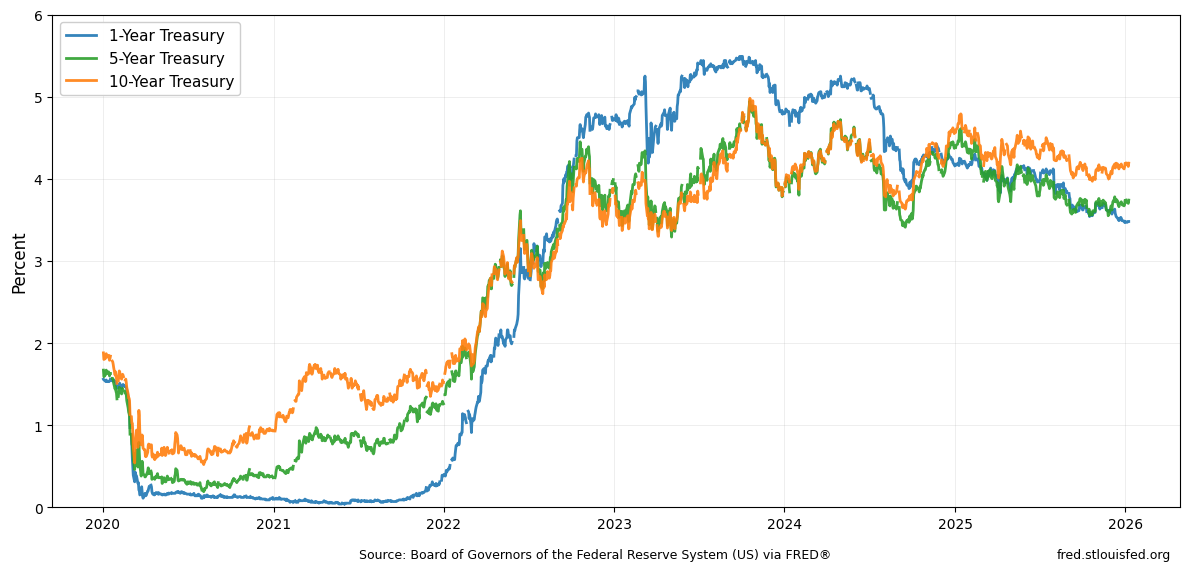

Figure saved to ../figures/treasury_yield_curve.png


In [8]:
# Create figure for yield curve comparison
fig, ax = plt.subplots(figsize=(12, 6))

# Filter data from 2020 onwards for better visibility
df_yields = df.loc['2020':].copy()

# Plot all three yield curves
ax.plot(df_yields.index, df_yields['1Y Treasury'], 
        color='#1f77b4', linewidth=2, label='1-Year Treasury', alpha=0.9)
ax.plot(df_yields.index, df_yields['5Y Treasury'], 
        color='#2ca02c', linewidth=2, label='5-Year Treasury', alpha=0.9)
ax.plot(df_yields.index, df_yields['10Y Treasury'], 
        color='#ff7f0e', linewidth=2, label='10-Year Treasury', alpha=0.9)

# Customize the plot
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('Percent', fontsize=12)
ax.set_ylim(0, 6)
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# Legend
ax.legend(loc='upper left', fontsize=11, framealpha=0.95)

# Add title in the style of FRED
# title_text = 'Market Yield on U.S. Treasury Securities at 1-Year Constant Maturity, Quoted on an Investment Basis\n'
# title_text += 'Market Yield on U.S. Treasury Securities at 5-Year Constant Maturity, Quoted on an Investment Basis\n'
# title_text += 'Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis'
# ax.text(0.02, 0.98, title_text, 
#         transform=ax.transAxes, fontsize=10, verticalalignment='top',
#         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add source
source_text = 'Source: Board of Governors of the Federal Reserve System (US) via FRED®'
fig.text(0.5, 0.02, source_text, fontsize=9, ha='center')
fig.text(0.98, 0.02, 'fred.stlouisfed.org', fontsize=9, ha='right')

plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.savefig('../figures/treasury_yield_curve.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved to ../figures/treasury_yield_curve.png")

## Summary Statistics

In [ ]:
# Display summary statistics
print("Summary Statistics (1960-Present):")
print("\nCPI Year-over-Year % Change:")
print(df['CPI_YoY'].describe())
print("\n10-Year Treasury Yield:")
print(df['10Y Treasury'].describe())
print("\nRecent Values (Last observation):")
print(df[['CPI_YoY', '1Y Treasury', '5Y Treasury', '10Y Treasury']].tail(1))